<!-- -*- coding: utf-8 -*- -->
Universita digli di GENOVA                               
   Graph Analytics
2018-2019 


<h1 style="color:#990000;text-align: center"> Part 3 : SOCIAL CONTAGION  </h1>
    <h4 style="color:#00b00;text-align: center"> Souad BOUTANE</h4> 
   

--------------------------------------------------------

<h3 style="color:#990000">. INTRODUCTION </h3>


The aim of this part is to investigate the social contagion in a network by implementing the networked coordination game as described in class:

1- First we generate graph  

    >Part 1: Synthetic graphs
    >Part 2: LINUX graph

2- Second we define the payoff matrix 

3- Third we choose some random nodes that start the contagion

4- Fourth visualaze the change in each step.






<h3 style="color:#990000">Part 1: Use synthetic graphs</h3> 

In the first part, we will use a graph provided by Networx library , which is :


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from celluloid import Camera
import random


class Contagion:
    
    def __init__(self,G,a=0,b=1,per=0):
        self.G=G
        self.pos=nx.spring_layout(G)
        self.payOff=b/(a+b)
        nx.set_node_attributes(G, "green", 'contagion')
        self.initialize_contagion(per)
        self.fig = plt.figure()
        self.camera = Camera(self.fig)
        
    def set_payOff(self,a,b):
        self.q=b/(a+b)
    
    def initialize_contagion(self, percentage=0.2):
        n = len(self.G) * percentage
        for i in range(int(n)):
            v = random.choice(list(self.G.node.keys()))
            self.G.node[v]['contagion'] = "red"
    
    def draw (self,title):
        colors = nx.get_node_attributes(self.G, 'contagion').values()
        self.fig
        nx.draw_networkx_edges(self.G, self.pos, alpha=0.1)
        nx.draw_networkx_nodes(self.G, self.pos,node_color=colors, node_size=5)
        plt.title(title)
        plt.show()
        self.camera.snap()
        


    def diffusion(self):
        
        #The totale number of affected nodes
        old_affected_nodes=sum(1 for i in nx.get_node_attributes(self.G, 'contagion').values() if i=="red")
        #The totale number of nodes in the graph
        total_nodes=self.G.number_of_nodes()
        
        stop=False
        it=1

        while not stop:
            #print("Iteration :", it)

            #select the label of healty nodes in the current iteration
            green_nodes= [i[0] for i in nx.get_node_attributes(self.G, 'contagion').items() if i[1]=="green"]
            for i in green_nodes:
                #extract neighbours of node i
                i_edges=list(self.G.edges(i))

                if len(i_edges)==0:
                    continue
                else:
                    #calculate the numbers of affected neighbours
                    p=0
                    for x in i_edges:
                        neigh=x[1]
                        if self.G.nodes[neigh]['contagion']=='red':
                            p=p+1

                    #decid to affect or not i      
                    if (p/(len(i_edges)))>=self.payOff:
                        self.G.nodes[i]['contagion']='red'

            new_affected_nodes=sum(1 for i in nx.get_node_attributes(self.G, 'contagion').values() if i=="red")
            txt="Graph iteration"+str(it)
            if (old_affected_nodes==new_affected_nodes) or (new_affected_nodes==total_nodes):
                stop=True
                self.draw(txt)
                print("old_affected_nodes :",old_affected_nodes)
                print("new_affected_nodes :",new_affected_nodes)
                print("graph number of nodes :",total_nodes)
            else:
                old_affected_nodes=new_affected_nodes
                it=it+1
                self.draw(txt)

        animation = self.camera.animate()  
        animation.save('animation.gif', writer = 'imagemagick')
        

<h3 style="color:#2E8B57">1: Synthetic Graph of karate_club  </h3>

C:\Users\souad\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


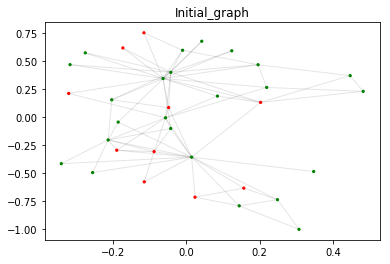

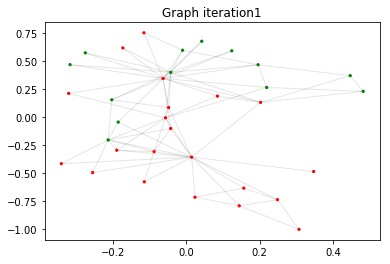

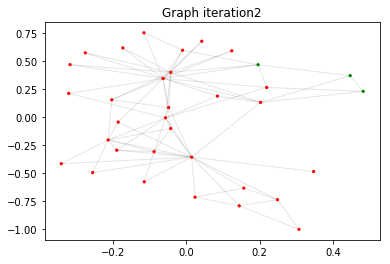

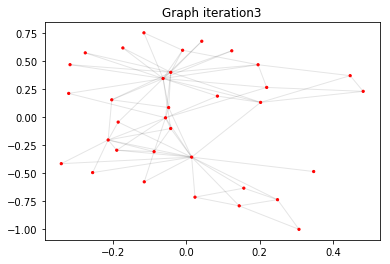

MovieWriter imagemagick unavailable. Trying to use pillow instead.


old_affected_nodes : 31
new_affected_nodes : 34
graph number of nodes : 34


In [8]:
G = nx.karate_club_graph()

synthetic=Contagion(G,a=13,b=8,per=0.3)
synthetic.draw('Initial_graph')

synthetic.diffusion()


<h3 style="color:#2E8B57">2: Synthetic Graph of Erdos Renyi  </h3>

C:\Users\souad\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


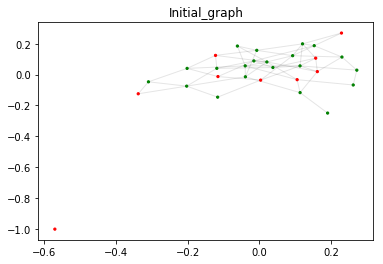

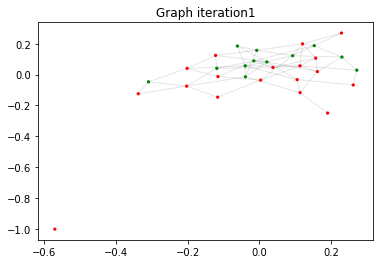

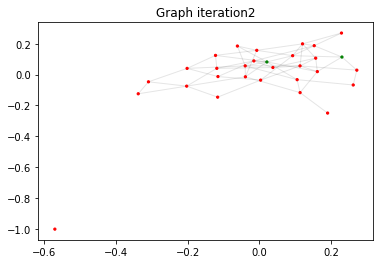

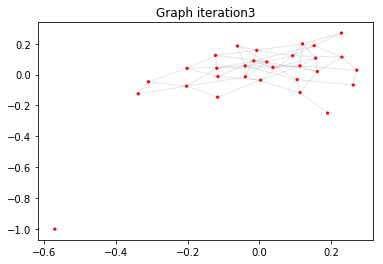

MovieWriter imagemagick unavailable. Trying to use pillow instead.


old_affected_nodes : 28
new_affected_nodes : 30
graph number of nodes : 30


In [7]:
n = 30  # 10 nodes
m = 60  # 20 edges

G = nx.gnm_random_graph(n, m)

Erdos_Renyi=Contagion(G,a=13,b=8,per=0.3)
Erdos_Renyi.draw('Initial_graph')

Erdos_Renyi.diffusion()


No Tightly-knit community in these networks that can serve as a barrier to diffusion and the graphs are fully affected with initial contagion of 30% and q=38% (b=8,a=13).
the initial contagion and q play a principale role of the affectation of the full graph

<h3 style="color:#2E8B57">3: Synthetic Graph of small world  </h3>

C:\Users\souad\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


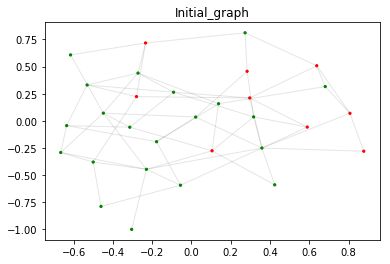

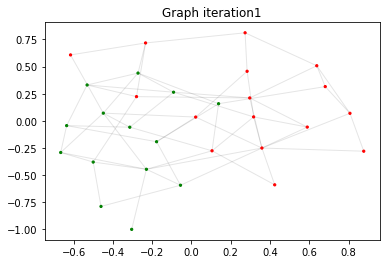

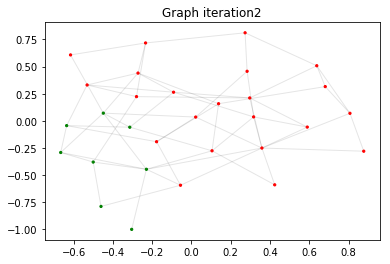

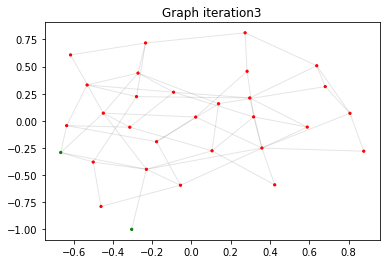

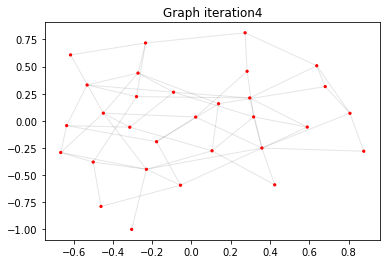

MovieWriter imagemagick unavailable. Trying to use pillow instead.


old_affected_nodes : 28
new_affected_nodes : 30
graph number of nodes : 30


In [6]:
n = 30  # 10 nodes
m = 60  # 20 edges

G = nx.gnm_random_graph(n, m)

small_worl=Contagion(G,a=13,b=8,per=0.3)
small_worl.draw('Initial_graph')

small_worl.diffusion()



<h3 style="color:#2E8B57">4. Use LINUX graph </h3>

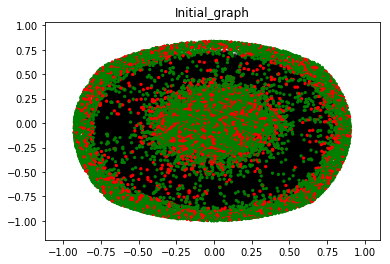

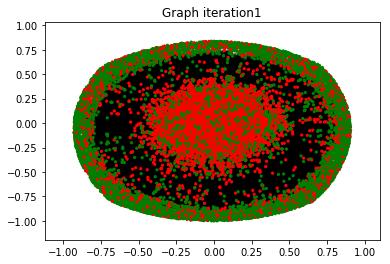

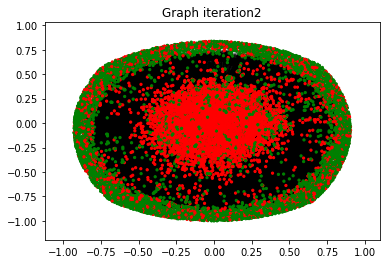

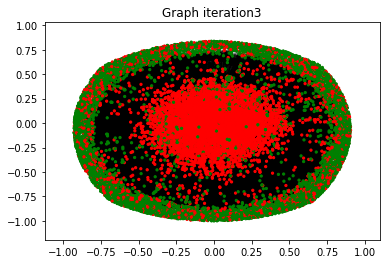

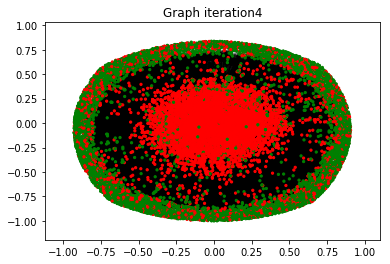

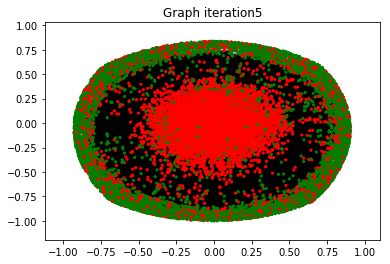

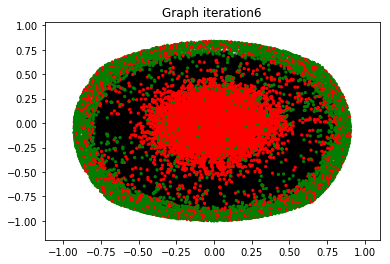

MovieWriter imagemagick unavailable. Trying to use pillow instead.


old_affected_nodes : 25265
new_affected_nodes : 25265
graph number of nodes : 30837


In [2]:
G=nx.read_edgelist('data/out.csv','%', nodetype=int,delimiter=";", create_using=nx.DiGraph())

linux=Contagion(G,a=13,b=8,per=0.3)
linux.draw('Initial_graph')

linux.diffusion()

Tightly-knit community in these networks play the role of barrier of diffusion .